In [ ]:
 from matplotlib import pyplot as plt

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None)

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
df=pd.read_csv('Modified-II.csv',header=0,index_col=0)

In [ ]:
df.head()

,Application Name,Gartner PACE View,Business Group,Sub-Business Group,Core Business Process,Application Age,Business Criticality,Application Life Cycle Stage,Future Potential,Functional Complexity,Functional Fitment,Functional Redundancy,Functional Knowledge Availability,Number of application users,Technical Scalability(adding new users/transactions),Primary Application User,Usability,Current Application Usage,Expected user growth,Peak frequency,Impact on Business if application is down,Application Construction Type,Application Deployment Type,Operating System Revised,Programming Language Revised,Database Revised,Middleware Revised,Architecture Alignment,Inbound Interfaces,Outbound Interfaces,Technical Documentation Availability,Functional Documentation Availability,Current Support Model,Product Vendor Dependence,Interaction with Business Users,Support Time Frame,Application Availability Expectation (uptime %),Probability of High Magnitude Risk,Business Fitness,Operational Risk,Difficulty to Support,Age,OS Rank,PL Rank,DB Rank,Middleware Rank,Technical Diversity,Techical Adequacy,Technical Risk,Technical Fitness,Calculated Quadrant,.
Application Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
133,Absent-Late,System of Record,HAFM,Human Resources,HR tracking,3.5,1.05,0.2,0.6,1.398,0.1,No,0.2,0.70,0.25,0.8,0.60,1.0,0.3,All the Time,Financial,0.9,Desktop,3.0,3.0,3.0,0.0,0.30,10,10,0.2000,0.625,0.25,0.2500,0.9,1.000,1.00,Unlikely,3.417,1.932,2.4000,3.8,3.0,3.0,3.0,0.0,2.700,2.300,1.8500,2.6968,I,I
577,Activplant,System of Record,MFG,Asset Management,Asset maintaince,2.8,1.40,0.2,1.0,2.202,0.1,No,0.4,1.75,0.25,0.8,0.45,1.0,0.3,All the Time,Financial,0.9,Web-based,2.5,2.0,2.5,2.0,0.60,0,0,0.2000,0.625,0.25,0.5825,1.2,1.000,1.00,Unlikely,4.183,2.534,3.0325,3.1,2.5,2.0,2.5,2.0,2.275,2.725,1.6375,3.9968,I,I
125,AEP Delivery,System of Record,MFG,Delivery,Production planning,3.5,1.75,0.2,NaN,3.000,0.3,No,0.4,0.70,0.25,0.8,0.60,1.0,0.3,All the Time,Financial,0.9,Others,3.0,3.0,3.0,3.0,0.45,5,15,0.2000,0.625,0.25,0.5825,1.2,1.000,1.00,Unlikely,2.650,3.466,3.0325,4.0,3.0,3.0,3.0,3.0,3.000,2.000,2.5000,3.2936,I,T
AHM 68,AHM Legal Matter Application (ALMA),System of Record,HAFM,Legal & Compliance,Financial Asset Management (FIN),2.1,1.40,0.2,0.6,3.000,0.1,No,0.6,0.70,0.25,0.4,0.45,1.0,0.4,Business Hours,Legal,0.9,Web-based,4.0,5.0,4.0,5.0,0.45,0,4,0.1468,0.625,0.75,1.2500,1.5,1.000,1.00,Multiple,3.175,4.200,4.5000,2.4,4.0,5.0,4.0,5.0,4.450,0.550,2.7250,2.1736,M,I
NaN,APS - Advance Planning System,System of Record,SCM&A,E-Planning & Purchasing,Capacity and Demand Planning. After the month;...,2.1,1.40,0.2,0.6,3.000,0.1,No,0.4,0.70,0.25,0.8,0.60,1.0,0.3,Business Hours,Financial,0.9,Client Server,2.5,5.0,1.0,3.0,0.45,10 TO 20,10 TO 20,0.2000,0.625,0.75,1.2500,1.2,0.734,0.99,Support risk,3.200,3.600,3.9340,2.4,2.5,5.0,1.0,3.0,3.125,1.875,2.0625,3.2550,I,I


In [ ]:
numerical_columns=[feature for feature in df.columns if df[feature].dtype!='O']#It means "a python object", i.e. not one of the builtin scalar types supported by numpy. np. array([object()]). dtype => dtype('O')

In [ ]:
numerical_columns

['Application Age',
 'Business Criticality',
 'Application Life Cycle Stage',
 'Future Potential',
 'Functional Complexity',
 'Functional Fitment',
 'Functional Knowledge Availability',
 'Number of application users',
 'Technical Scalability(adding new users/transactions)',
 'Primary Application User',
 'Usability',
 'Current Application Usage',
 'Expected user growth',
 'Application Construction Type',
 'Operating System Revised',
 'Programming Language Revised',
 'Database Revised',
 'Middleware Revised',
 'Architecture Alignment',
 'Technical Documentation Availability',
 'Functional Documentation Availability',
 'Current Support Model',
 'Product Vendor Dependence',
 'Interaction with Business Users',
 'Support Time Frame',
 'Application Availability Expectation (uptime %)',
 'Business Fitness',
 'Operational Risk',
 'Difficulty to Support',
 'Age',
 'OS Rank',
 'PL Rank',
 'DB Rank',
 'Middleware Rank',
 'Technical Diversity',
 'Techical Adequacy',
 'Technical Risk',
 'Technical F

In [ ]:
df[numerical_columns].head()

,Application Age,Business Criticality,Application Life Cycle Stage,Future Potential,Functional Complexity,Functional Fitment,Functional Knowledge Availability,Number of application users,Technical Scalability(adding new users/transactions),Primary Application User,Usability,Current Application Usage,Expected user growth,Application Construction Type,Operating System Revised,Programming Language Revised,Database Revised,Middleware Revised,Architecture Alignment,Technical Documentation Availability,Functional Documentation Availability,Current Support Model,Product Vendor Dependence,Interaction with Business Users,Support Time Frame,Application Availability Expectation (uptime %),Business Fitness,Operational Risk,Difficulty to Support,Age,OS Rank,PL Rank,DB Rank,Middleware Rank,Technical Diversity,Techical Adequacy,Technical Risk,Technical Fitness
Application Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
133,3.5,1.05,0.2,0.6,1.398,0.1,0.2,0.70,0.25,0.8,0.60,1.0,0.3,0.9,3.0,3.0,3.0,0.0,0.30,0.2000,0.625,0.25,0.2500,0.9,1.000,1.00,3.417,1.932,2.4000,3.8,3.0,3.0,3.0,0.0,2.700,2.300,1.8500,2.6968
577,2.8,1.40,0.2,1.0,2.202,0.1,0.4,1.75,0.25,0.8,0.45,1.0,0.3,0.9,2.5,2.0,2.5,2.0,0.60,0.2000,0.625,0.25,0.5825,1.2,1.000,1.00,4.183,2.534,3.0325,3.1,2.5,2.0,2.5,2.0,2.275,2.725,1.6375,3.9968
125,3.5,1.75,0.2,NaN,3.000,0.3,0.4,0.70,0.25,0.8,0.60,1.0,0.3,0.9,3.0,3.0,3.0,3.0,0.45,0.2000,0.625,0.25,0.5825,1.2,1.000,1.00,2.650,3.466,3.0325,4.0,3.0,3.0,3.0,3.0,3.000,2.000,2.5000,3.2936
AHM 68,2.1,1.40,0.2,0.6,3.000,0.1,0.6,0.70,0.25,0.4,0.45,1.0,0.4,0.9,4.0,5.0,4.0,5.0,0.45,0.1468,0.625,0.75,1.2500,1.5,1.000,1.00,3.175,4.200,4.5000,2.4,4.0,5.0,4.0,5.0,4.450,0.550,2.7250,2.1736
NaN,2.1,1.40,0.2,0.6,3.000,0.1,0.4,0.70,0.25,0.8,0.60,1.0,0.3,0.9,2.5,5.0,1.0,3.0,0.45,0.2000,0.625,0.75,1.2500,1.2,0.734,0.99,3.200,3.600,3.9340,2.4,2.5,5.0,1.0,3.0,3.125,1.875,2.0625,3.2550


In [ ]:
for feature in numerical_columns:
  af=df[feature].unique()
print (af)

[2.6968 3.9968 3.2936 2.1736 3.255  2.4336 2.8968 3.4968 1.4364 2.9014
 1.81   1.9554 2.1436 1.6068 2.7668 2.3764 3.4218 2.18   2.0686 3.3468
 2.24   2.0904 3.0732 2.7368 3.295  2.0668 3.2232 2.58   1.4668 2.4936
 2.1204 3.1582 1.4468 3.5186 2.0468 2.9168 3.08   2.64   1.96   2.1482
 2.52   2.1968 1.3936 2.7304 1.66   3.365  2.715  3.0468 2.2336 2.3568
 2.3768 2.79   2.09   3.4368 1.46   1.01   2.2768 2.0132 1.51   2.67
 2.2168 3.1968 3.0668 1.79   2.13   2.5636 2.5968 1.4836 2.7514 2.6704]


In [ ]:
numerical_columns_cont=[feature for feature in numerical_columns if len(df[feature].unique())>25] 

In [ ]:
numerical_columns_cont

['Business Fitness',
 'Operational Risk',
 'Difficulty to Support',
 'Technical Diversity',
 'Techical Adequacy',
 'Technical Risk',
 'Technical Fitness']

In [ ]:
numerical_columns_dis=[feature for feature in numerical_columns if feature not in numerical_columns_cont]

In [ ]:
numerical_columns_dis

['Application Age',
 'Business Criticality',
 'Application Life Cycle Stage',
 'Future Potential',
 'Functional Complexity',
 'Functional Fitment',
 'Functional Knowledge Availability',
 'Number of application users',
 'Technical Scalability(adding new users/transactions)',
 'Primary Application User',
 'Usability',
 'Current Application Usage',
 'Expected user growth',
 'Application Construction Type',
 'Operating System Revised',
 'Programming Language Revised',
 'Database Revised',
 'Middleware Revised',
 'Architecture Alignment',
 'Technical Documentation Availability',
 'Functional Documentation Availability',
 'Current Support Model',
 'Product Vendor Dependence',
 'Interaction with Business Users',
 'Support Time Frame',
 'Application Availability Expectation (uptime %)',
 'Age',
 'OS Rank',
 'PL Rank',
 'DB Rank',
 'Middleware Rank']

In [ ]:
df['Calculated Quadrant'].unique()

array(['I', 'M', 'E', '0', 'T'], dtype=object)

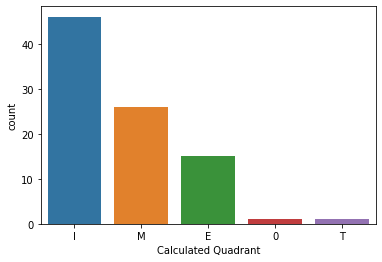

In [ ]:
sns.countplot(df['Calculated Quadrant'])

Application Age


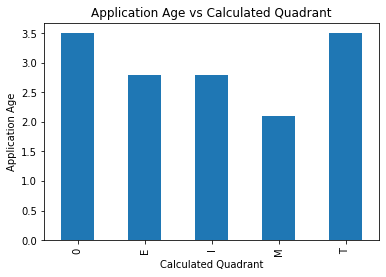

Business Criticality


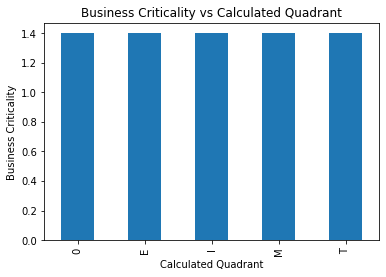

Application Life Cycle Stage


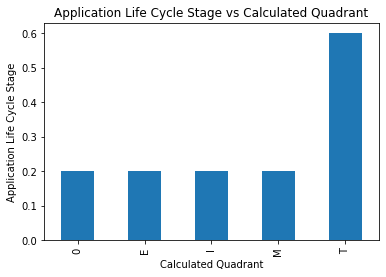

Future Potential


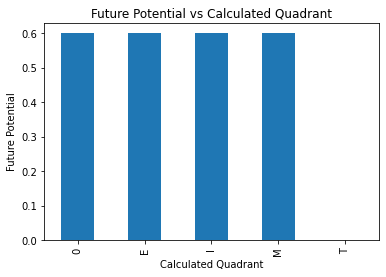

Functional Complexity


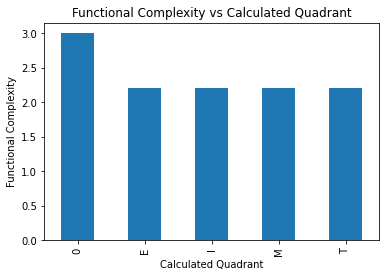

Functional Fitment


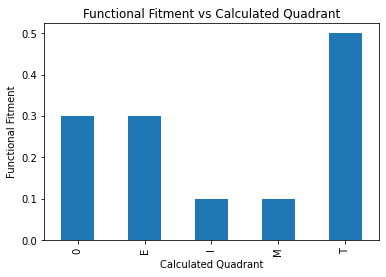

Functional Knowledge Availability


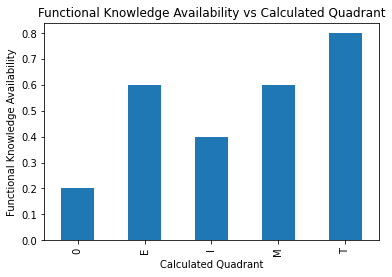

Number of application users


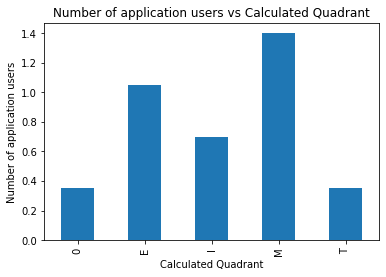

Technical Scalability(adding new users/transactions)


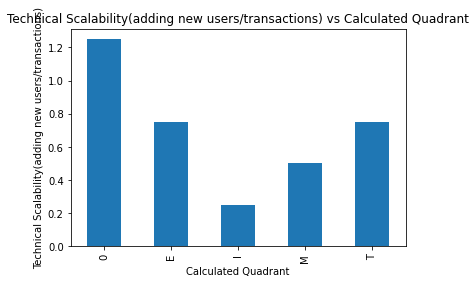

Primary Application User


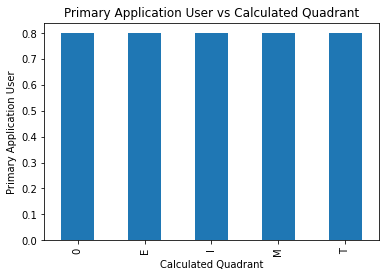

Usability


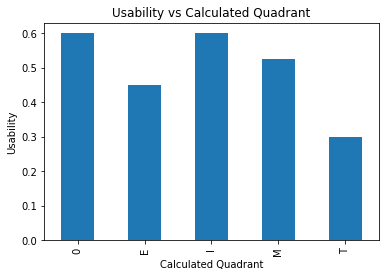

Current Application Usage


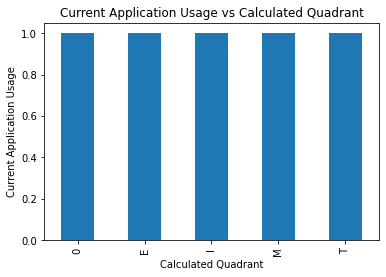

Expected user growth


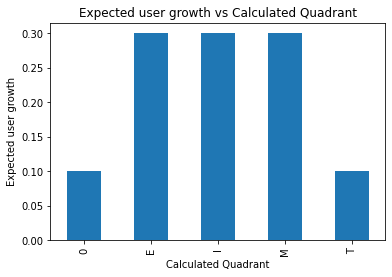

Application Construction Type


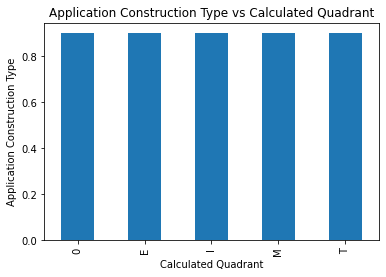

Operating System Revised


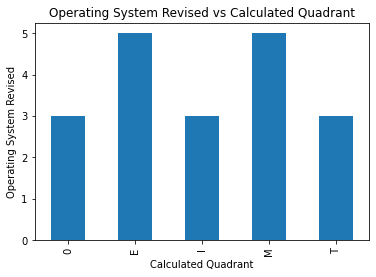

Programming Language Revised


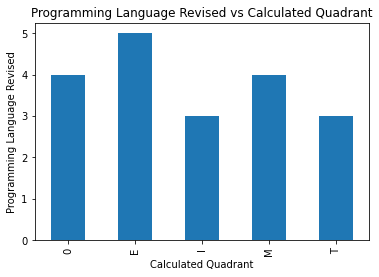

Database Revised


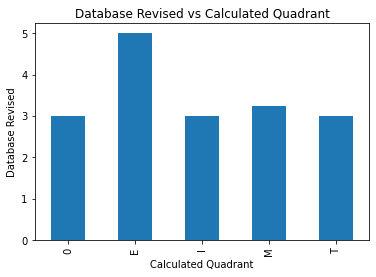

Middleware Revised


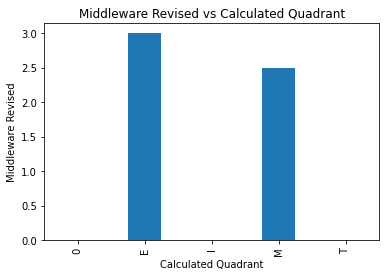

Architecture Alignment


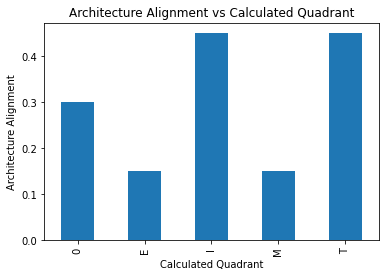

Technical Documentation Availability


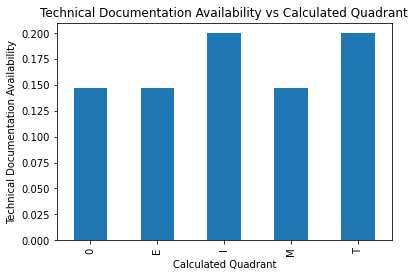

Functional Documentation Availability


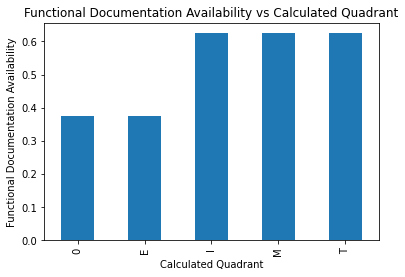

Current Support Model


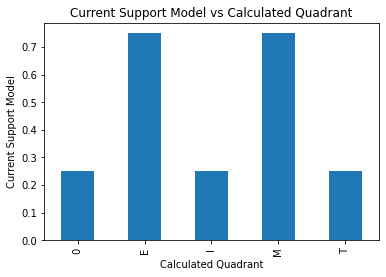

Product Vendor Dependence


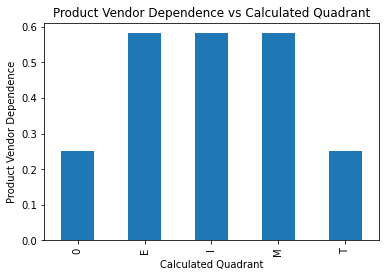

Interaction with Business Users


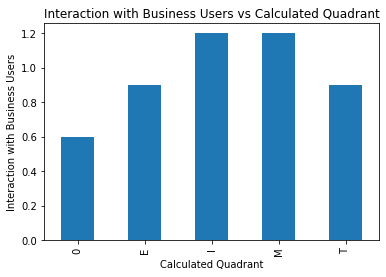

Support Time Frame


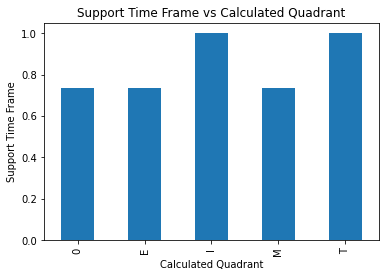

Application Availability Expectation (uptime %)


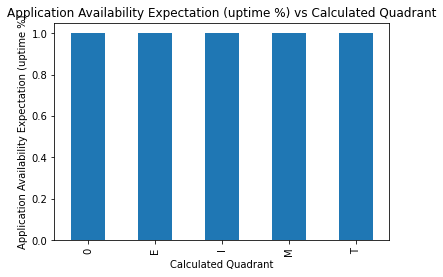

Age


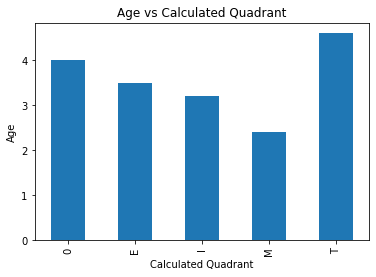

OS Rank


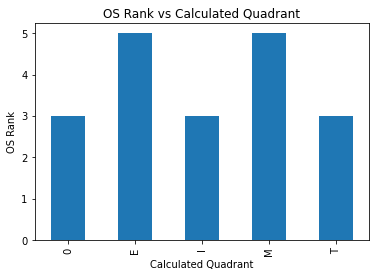

PL Rank


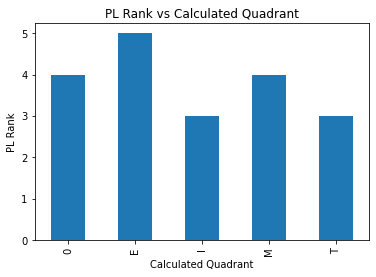

DB Rank


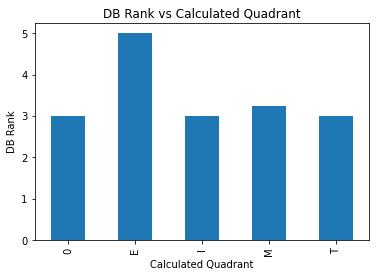

Middleware Rank


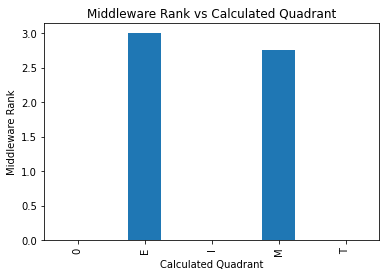

In [ ]:
for x in numerical_columns_dis:
    print(x)
    df.groupby('Calculated Quadrant')[x].median().plot.bar()
    plt.xlabel('Calculated Quadrant')
    plt.ylabel(x)
    plt.title(x+' vs Calculated Quadrant')
    plt.show()

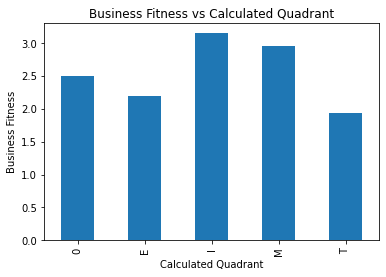

In [ ]:
df.groupby('Calculated Quadrant')['Business Fitness'].median().plot.bar()
plt.xlabel('Calculated Quadrant')
plt.ylabel('Business Fitness')
plt.title('Business Fitness vs Calculated Quadrant')
plt.show()

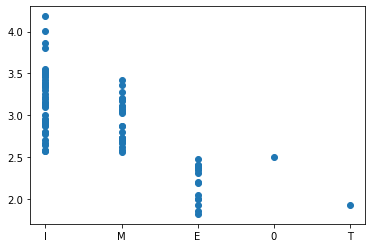

In [ ]:
plt.scatter(x=df['Calculated Quadrant'],y=df['Business Fitness'])

In [ ]:
numerical_columns_cont

['Business Fitness',
 'Operational Risk',
 'Difficulty to Support',
 'Technical Diversity',
 'Techical Adequacy',
 'Technical Risk',
 'Technical Fitness']

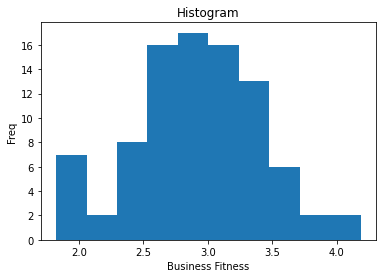

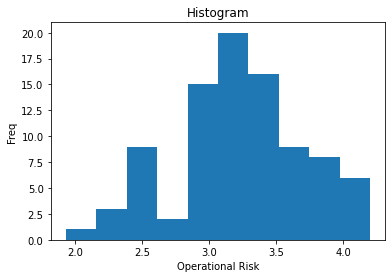

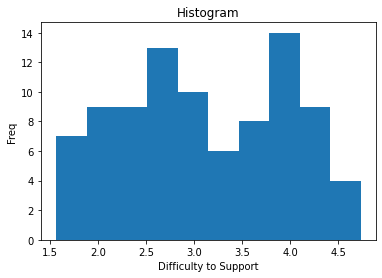

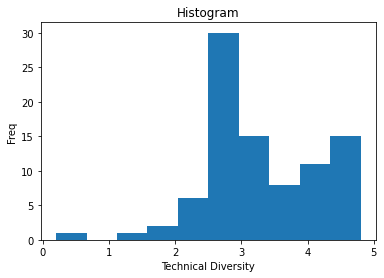

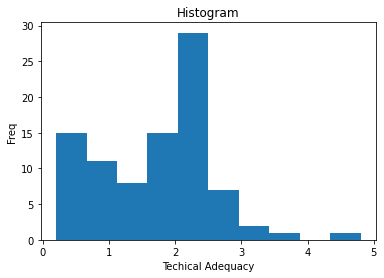

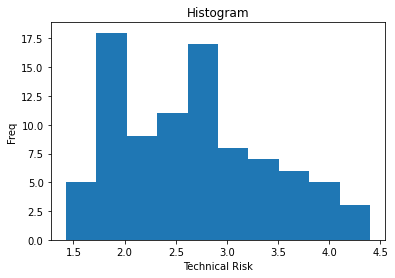

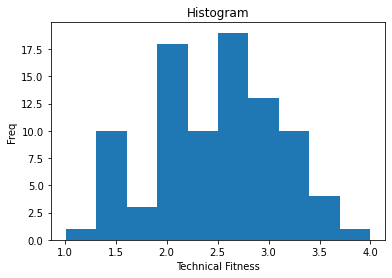

In [ ]:
for x in numerical_columns_cont:
    plt.hist(x=df[x],bins=None)
    plt.xlabel(x)
    plt.ylabel('Freq')
    plt.title('Histogram')
    plt.show()

In [ ]:
data=df.copy()
for x in numerical_columns_cont:
    data[x]=np.log(data[x])

In [ ]:
data[numerical_columns_cont].head(15)

,Business Fitness,Operational Risk,Difficulty to Support,Technical Diversity,Techical Adequacy,Technical Risk,Technical Fitness
Application Id,,,,,,,
133,1.228763,0.658556,0.875469,0.993252,0.832909,0.615186,0.992066
577,1.431029,0.929799,1.109387,0.821980,1.002468,0.493171,1.385494
125,0.974560,1.243001,1.109387,1.098612,0.693147,0.916291,1.191981
AHM 68,1.155308,1.435085,1.504077,1.492904,-0.597837,1.002468,0.776385
NaN,1.163151,1.280934,1.369657,1.139434,0.628609,0.723919,1.180192
564,0.965081,1.183566,1.262006,0.821980,1.002468,0.759637,0.889372
137,1.218763,1.121026,0.875469,0.993252,0.832909,0.615186,1.063607
139,1.203873,1.121026,0.993252,0.993252,0.832909,0.615186,1.063607
NaN,1.058831,0.981329,0.757998,1.064711,0.741937,0.667829,1.251848


In [ ]:
df[numerical_columns_cont].head(15)

,Business Fitness,Operational Risk,Difficulty to Support,Technical Diversity,Techical Adequacy,Technical Risk,Technical Fitness
Application Id,,,,,,,
133,3.417,1.932,2.4000,2.700,2.300,1.8500,2.6968
577,4.183,2.534,3.0325,2.275,2.725,1.6375,3.9968
125,2.650,3.466,3.0325,3.000,2.000,2.5000,3.2936
AHM 68,3.175,4.200,4.5000,4.450,0.550,2.7250,2.1736
NaN,3.200,3.600,3.9340,3.125,1.875,2.0625,3.2550
564,2.625,3.266,3.5325,2.275,2.725,2.1375,2.4336
137,3.383,3.068,2.4000,2.700,2.300,1.8500,2.8968
139,3.333,3.068,2.7000,2.700,2.300,1.8500,2.8968
NaN,2.883,2.668,2.1340,2.900,2.100,1.9500,3.4968


In [ ]:
df.head()

,Application Name,Gartner PACE View,Business Group,Sub-Business Group,Core Business Process,Application Age,Business Criticality,Application Life Cycle Stage,Future Potential,Functional Complexity,Functional Fitment,Functional Redundancy,Functional Knowledge Availability,Number of application users,Technical Scalability(adding new users/transactions),Primary Application User,Usability,Current Application Usage,Expected user growth,Peak frequency,Impact on Business if application is down,Application Construction Type,Application Deployment Type,Operating System Revised,Programming Language Revised,Database Revised,Middleware Revised,Architecture Alignment,Inbound Interfaces,Outbound Interfaces,Technical Documentation Availability,Functional Documentation Availability,Current Support Model,Product Vendor Dependence,Interaction with Business Users,Support Time Frame,Application Availability Expectation (uptime %),Probability of High Magnitude Risk,Business Fitness,Operational Risk,Difficulty to Support,Age,OS Rank,PL Rank,DB Rank,Middleware Rank,Technical Diversity,Techical Adequacy,Technical Risk,Technical Fitness,Calculated Quadrant,.
Application Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
133,Absent-Late,System of Record,HAFM,Human Resources,HR tracking,3.5,1.05,0.2,0.6,1.398,0.1,No,0.2,0.70,0.25,0.8,0.60,1.0,0.3,All the Time,Financial,0.9,Desktop,3.0,3.0,3.0,0.0,0.30,10,10,0.2000,0.625,0.25,0.2500,0.9,1.000,1.00,Unlikely,3.417,1.932,2.4000,3.8,3.0,3.0,3.0,0.0,2.700,2.300,1.8500,2.6968,I,I
577,Activplant,System of Record,MFG,Asset Management,Asset maintaince,2.8,1.40,0.2,1.0,2.202,0.1,No,0.4,1.75,0.25,0.8,0.45,1.0,0.3,All the Time,Financial,0.9,Web-based,2.5,2.0,2.5,2.0,0.60,0,0,0.2000,0.625,0.25,0.5825,1.2,1.000,1.00,Unlikely,4.183,2.534,3.0325,3.1,2.5,2.0,2.5,2.0,2.275,2.725,1.6375,3.9968,I,I
125,AEP Delivery,System of Record,MFG,Delivery,Production planning,3.5,1.75,0.2,NaN,3.000,0.3,No,0.4,0.70,0.25,0.8,0.60,1.0,0.3,All the Time,Financial,0.9,Others,3.0,3.0,3.0,3.0,0.45,5,15,0.2000,0.625,0.25,0.5825,1.2,1.000,1.00,Unlikely,2.650,3.466,3.0325,4.0,3.0,3.0,3.0,3.0,3.000,2.000,2.5000,3.2936,I,T
AHM 68,AHM Legal Matter Application (ALMA),System of Record,HAFM,Legal & Compliance,Financial Asset Management (FIN),2.1,1.40,0.2,0.6,3.000,0.1,No,0.6,0.70,0.25,0.4,0.45,1.0,0.4,Business Hours,Legal,0.9,Web-based,4.0,5.0,4.0,5.0,0.45,0,4,0.1468,0.625,0.75,1.2500,1.5,1.000,1.00,Multiple,3.175,4.200,4.5000,2.4,4.0,5.0,4.0,5.0,4.450,0.550,2.7250,2.1736,M,I
NaN,APS - Advance Planning System,System of Record,SCM&A,E-Planning & Purchasing,Capacity and Demand Planning. After the month;...,2.1,1.40,0.2,0.6,3.000,0.1,No,0.4,0.70,0.25,0.8,0.60,1.0,0.3,Business Hours,Financial,0.9,Client Server,2.5,5.0,1.0,3.0,0.45,10 TO 20,10 TO 20,0.2000,0.625,0.75,1.2500,1.2,0.734,0.99,Support risk,3.200,3.600,3.9340,2.4,2.5,5.0,1.0,3.0,3.125,1.875,2.0625,3.2550,I,I


In [ ]:
categ_columns=[feature for feature in df.columns if df[feature].dtype=='O']

In [ ]:
categ_columns

['Application Name',
 'Gartner PACE View',
 'Business Group',
 'Sub-Business Group',
 'Core Business Process',
 'Functional Redundancy',
 'Peak frequency',
 'Impact on Business if application is down',
 'Application Deployment Type',
 'Inbound Interfaces',
 'Outbound Interfaces',
 'Probability of High Magnitude  Risk',
 'Calculated Quadrant',
 '.']

In [ ]:
for feature in df.columns:
    print(feature,df[feature].isnull().sum())

Application Name 0
Gartner PACE View 0
Business Group 0
Sub-Business Group 0
Core Business Process 0
Application Age 0
Business Criticality 0
Application Life Cycle Stage 0
Future Potential 18
Functional Complexity 0
Functional Fitment 0
Functional Redundancy 0
Functional Knowledge Availability 0
Number of application users 0
Technical Scalability(adding new users/transactions) 0
Primary Application User 0
Usability 0
Current Application Usage 0
Expected user growth 0
Peak frequency 0
Impact on Business if application is down 0
Application Construction Type 0
Application Deployment Type 0
Operating System Revised 1
Programming Language Revised 1
Database Revised 0
Middleware Revised 1
Architecture Alignment 0
Inbound Interfaces 0
Outbound Interfaces 0
Technical Documentation Availability 0
Functional Documentation Availability 0
Current Support Model 0
Product Vendor Dependence 0
Interaction with Business Users 0
Support Time Frame 0
Application Availability Expectation (uptime %) 0
Pr

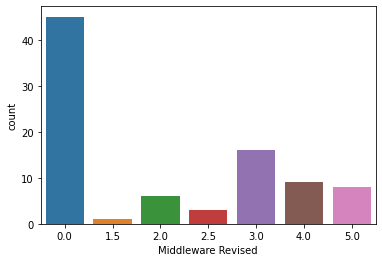

In [ ]:
sns.countplot(df['Middleware Revised'])

In [ ]:
df['Middleware Revised'].fillna(0,inplace=True)

In [ ]:
df.isnull().sum()

Application Name                                         0
Gartner PACE View                                        0
Business Group                                           0
Sub-Business Group                                       0
Core Business Process                                    0
Application Age                                          0
Business Criticality                                     0
Application Life Cycle Stage                             0
Future Potential                                        18
Functional Complexity                                    0
Functional Fitment                                       0
Functional Redundancy                                    0
Functional Knowledge Availability                        0
Number of application users                              0
Technical Scalability(adding new users/transactions)     0
Primary Application User                                 0
Usability                                               

In [ ]:
df.to_csv('Modified-III.csv')

In [ ]:
categ_columns

['Application Name',
 'Gartner PACE View',
 'Business Group',
 'Sub-Business Group',
 'Core Business Process',
 'Functional Redundancy',
 'Peak frequency',
 'Impact on Business if application is down',
 'Application Deployment Type',
 'Inbound Interfaces',
 'Outbound Interfaces',
 'Probability of High Magnitude  Risk',
 'Calculated Quadrant',
 '.']

In [ ]:
df.drop(columns='Application Name',inplace=True,axis=1) #When inplace = True , the data is modified in place, 
                                                        #which means it will return nothing and the dataframe 
                                                        #is now updated. When inplace = False , which is the default, 
                                                        #then the operation is performed and it returns a copy of the object. You then need to save it to something.

In [ ]:
df['Inbound Interfaces'].unique()

array(['10', '0', '5', '10 TO 20', '100', '3', '6',
       'ODBC (Multiple Apps)', '1', '2', '4', '>50', '17', '14', '39',
       '5-10', '50', '12', '43', '13(HAM), 3(HMA)', '15', '129', '7'],
      dtype=object)

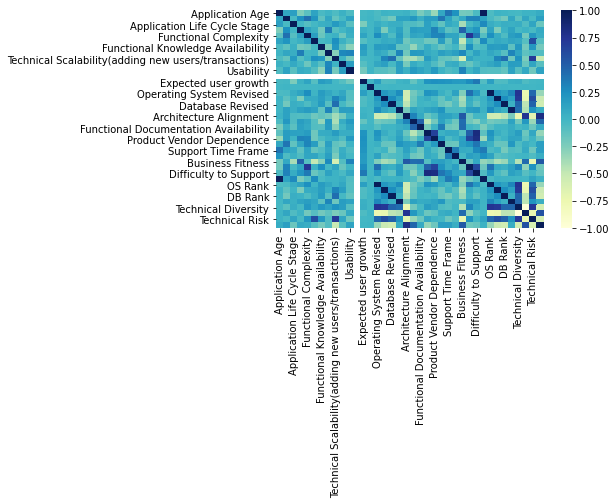

In [ ]:
sns.heatmap(df.corr(),cmap="YlGnBu")

In [ ]:
dataset=pd.read_csv('Modified-III.csv')

In [ ]:
dataset.head()

,Application Id,Application Name,Gartner PACE View,Business Group,Sub-Business Group,Core Business Process,Application Age,Business Criticality,Application Life Cycle Stage,Future Potential,Functional Complexity,Functional Fitment,Functional Redundancy,Functional Knowledge Availability,Number of application users,Technical Scalability(adding new users/transactions),Primary Application User,Usability,Current Application Usage,Expected user growth,Peak frequency,Impact on Business if application is down,Application Construction Type,Application Deployment Type,Operating System Revised,Programming Language Revised,Database Revised,Middleware Revised,Architecture Alignment,Inbound Interfaces,Outbound Interfaces,Technical Documentation Availability,Functional Documentation Availability,Current Support Model,Product Vendor Dependence,Interaction with Business Users,Support Time Frame,Application Availability Expectation (uptime %),Probability of High Magnitude Risk,Business Fitness,Operational Risk,Difficulty to Support,Age,OS Rank,PL Rank,DB Rank,Middleware Rank,Technical Diversity,Techical Adequacy,Technical Risk,Technical Fitness,Calculated Quadrant,.
0,133,Absent-Late,System of Record,HAFM,Human Resources,HR tracking,3.5,1.05,0.2,0.6,1.398,0.1,No,0.2,0.70,0.25,0.8,0.60,1.0,0.3,All the Time,Financial,0.9,Desktop,3.0,3.0,3.0,0.0,0.30,10,10,0.2000,0.625,0.25,0.2500,0.9,1.000,1.00,Unlikely,3.417,1.932,2.4000,3.8,3.0,3.0,3.0,0.0,2.700,2.300,1.8500,2.6968,I,I
1,577,Activplant,System of Record,MFG,Asset Management,Asset maintaince,2.8,1.40,0.2,1.0,2.202,0.1,No,0.4,1.75,0.25,0.8,0.45,1.0,0.3,All the Time,Financial,0.9,Web-based,2.5,2.0,2.5,2.0,0.60,0,0,0.2000,0.625,0.25,0.5825,1.2,1.000,1.00,Unlikely,4.183,2.534,3.0325,3.1,2.5,2.0,2.5,2.0,2.275,2.725,1.6375,3.9968,I,I
2,125,AEP Delivery,System of Record,MFG,Delivery,Production planning,3.5,1.75,0.2,NaN,3.000,0.3,No,0.4,0.70,0.25,0.8,0.60,1.0,0.3,All the Time,Financial,0.9,Others,3.0,3.0,3.0,3.0,0.45,5,15,0.2000,0.625,0.25,0.5825,1.2,1.000,1.00,Unlikely,2.650,3.466,3.0325,4.0,3.0,3.0,3.0,3.0,3.000,2.000,2.5000,3.2936,I,T
3,AHM 68,AHM Legal Matter Application (ALMA),System of Record,HAFM,Legal & Compliance,Financial Asset Management (FIN),2.1,1.40,0.2,0.6,3.000,0.1,No,0.6,0.70,0.25,0.4,0.45,1.0,0.4,Business Hours,Legal,0.9,Web-based,4.0,5.0,4.0,5.0,0.45,0,4,0.1468,0.625,0.75,1.2500,1.5,1.000,1.00,Multiple,3.175,4.200,4.5000,2.4,4.0,5.0,4.0,5.0,4.450,0.550,2.7250,2.1736,M,I
4,NaN,APS - Advance Planning System,System of Record,SCM&A,E-Planning & Purchasing,Capacity and Demand Planning. After the month;...,2.1,1.40,0.2,0.6,3.000,0.1,No,0.4,0.70,0.25,0.8,0.60,1.0,0.3,Business Hours,Financial,0.9,Client Server,2.5,5.0,1.0,3.0,0.45,10 TO 20,10 TO 20,0.2000,0.625,0.75,1.2500,1.2,0.734,0.99,Support risk,3.200,3.600,3.9340,2.4,2.5,5.0,1.0,3.0,3.125,1.875,2.0625,3.2550,I,I


In [ ]:
dataset.isnull().sum()

Application Id                                          28
Application Name                                         0
Gartner PACE View                                        0
Business Group                                           0
Sub-Business Group                                       0
Core Business Process                                    0
Application Age                                          0
Business Criticality                                     0
Application Life Cycle Stage                             0
Future Potential                                        18
Functional Complexity                                    0
Functional Fitment                                       0
Functional Redundancy                                    0
Functional Knowledge Availability                        0
Number of application users                              0
Technical Scalability(adding new users/transactions)     0
Primary Application User                                

In [ ]:
dataset.drop('Application Id',axis=1,inplace=True)

In [ ]:
for x in dataset.columns:
    print('The unique categories in {} column is: {}'.format(x,len(dataset[x].unique())))

The unique categories in Application Name column is: 89
The unique categories in Gartner PACE View column is: 2
The unique categories in Business Group column is: 3
The unique categories in Sub-Business Group column is: 24
The unique categories in Core Business Process column is: 53
The unique categories in Application Age column is: 5
The unique categories in Business Criticality column is: 3
The unique categories in Application Life Cycle Stage column is: 3
The unique categories in Future Potential column is: 4
The unique categories in Functional Complexity column is: 3
The unique categories in Functional Fitment column is: 3
The unique categories in Functional Redundancy column is: 3
The unique categories in Functional Knowledge Availability column is: 4
The unique categories in Number of application users column is: 5
The unique categories in Technical Scalability(adding new users/transactions) column is: 3
The unique categories in Primary Application User column is: 5
The unique c

In [ ]:
categ_columns

['Application Name',
 'Gartner PACE View',
 'Business Group',
 'Sub-Business Group',
 'Core Business Process',
 'Functional Redundancy',
 'Peak frequency',
 'Impact on Business if application is down',
 'Application Deployment Type',
 'Inbound Interfaces',
 'Probability of High Magnitude  Risk',
 'Calculated Quadrant',
 '.']

In [ ]:
dataset[categ_columns].head()

,Application Name,Gartner PACE View,Business Group,Sub-Business Group,Core Business Process,Functional Redundancy,Peak frequency,Impact on Business if application is down,Application Deployment Type,Inbound Interfaces,Probability of High Magnitude Risk,Calculated Quadrant,.
0,Absent-Late,System of Record,HAFM,Human Resources,HR tracking,No,All the Time,Financial,Desktop,10,Unlikely,I,I
1,Activplant,System of Record,MFG,Asset Management,Asset maintaince,No,All the Time,Financial,Web-based,0,Unlikely,I,I
2,AEP Delivery,System of Record,MFG,Delivery,Production planning,No,All the Time,Financial,Others,5,Unlikely,I,T
3,AHM Legal Matter Application (ALMA),System of Record,HAFM,Legal & Compliance,Financial Asset Management (FIN),No,Business Hours,Legal,Web-based,0,Multiple,M,I
4,APS - Advance Planning System,System of Record,SCM&A,E-Planning & Purchasing,Capacity and Demand Planning. After the month;...,No,Business Hours,Financial,Client Server,10 TO 20,Support risk,I,I


In [ ]:
categ_columns

['Application Name',
 'Gartner PACE View',
 'Business Group',
 'Sub-Business Group',
 'Core Business Process',
 'Functional Redundancy',
 'Peak frequency',
 'Impact on Business if application is down',
 'Application Deployment Type',
 'Inbound Interfaces',
 'Probability of High Magnitude  Risk',
 'Calculated Quadrant',
 '.']

In [ ]:
categ_columns.remove('Outbound Interfaces')

ValueError: ignored

In [ ]:
for x in categ_columns:
    print('The unique categories in {} column is: {}'.format(x,len(dataset[x].unique())))

The unique categories in Application Name column is: 89
The unique categories in Gartner PACE View column is: 2
The unique categories in Business Group column is: 3
The unique categories in Sub-Business Group column is: 24
The unique categories in Core Business Process column is: 53
The unique categories in Functional Redundancy column is: 3
The unique categories in Peak frequency column is: 3
The unique categories in Impact on Business if application is down column is: 4
The unique categories in Application Deployment Type column is: 5
The unique categories in Inbound Interfaces column is: 23
The unique categories in Probability of High Magnitude  Risk column is: 6
The unique categories in Calculated Quadrant column is: 5
The unique categories in . column is: 5


In [ ]:
dict_SBG=dataset['Core Business Process'].value_counts().to_dict()

In [ ]:
dict_SBG

{'AP/AR/GL/FA': 1,
 'Accounting & Tax': 3,
 'Admin and security': 1,
 'Asset maintaince': 5,
 'Benefits,Payroll,Compensation,etime,performance management, bonus and Merits': 1,
 'Capacity and Demand Planning. After the month;y Seihan meetings, APS gets feeds on Monthly Production Volumes (Fixed, Forecast and Ki Plan) and feeds downstream systems like CMS, GPCS etc. with Production Planning data. ': 1,
 'Compliance': 1,
 'Dashboard': 1,
 'Design Exchange with Supplier': 1,
 'Employee Training evaluation': 1,
 'Fiancial operation/ payments for Matter Mangament System ALMA': 1,
 'Financial Asset Management (FIN)': 1,
 'Financial Reporting': 2,
 'HR Payroll': 2,
 'HR data': 1,
 'HR tracking': 6,
 'Holds NA + HUM BOM data, feeds downstream systems, provides means to maintain MBPN, Model Master data, issues Instruction Sheets, and creates multiple reports': 1,
 'Import and trade compliance': 1,
 'Management of returnable Packs': 2,
 'Manpower Plan Vs Actual': 1,
 'Manpower reporting': 1,
 'M

In [ ]:
dataset['Core Business Process']=dataset['Core Business Process'].map(dict_SBG)

In [ ]:
dataset[categ_columns].head()

,Application Name,Gartner PACE View,Business Group,Sub-Business Group,Core Business Process,Functional Redundancy,Peak frequency,Impact on Business if application is down,Application Deployment Type,Inbound Interfaces,Probability of High Magnitude Risk,Calculated Quadrant,.
0,Absent-Late,System of Record,HAFM,Human Resources,6,No,All the Time,Financial,Desktop,10,Unlikely,I,I
1,Activplant,System of Record,MFG,Asset Management,5,No,All the Time,Financial,Web-based,0,Unlikely,I,I
2,AEP Delivery,System of Record,MFG,Delivery,1,No,All the Time,Financial,Others,5,Unlikely,I,T
3,AHM Legal Matter Application (ALMA),System of Record,HAFM,Legal & Compliance,1,No,Business Hours,Legal,Web-based,0,Multiple,M,I
4,APS - Advance Planning System,System of Record,SCM&A,E-Planning & Purchasing,1,No,Business Hours,Financial,Client Server,10 TO 20,Support risk,I,I


In [ ]:
for x in categ_columns[6:10]:
    print(dataset[x].unique())
    

['All the Time' 'Business Hours' 'Non Business Hours']
['Financial' 'Legal' 'Customer Experience' 'No Adverse Impact']
['Desktop' 'Web-based' 'Others' 'Client Server' 'Mobile']
['10' '0' '5' '10 TO 20' '100' '3' '6' 'ODBC (Multiple Apps)' '1' '2' '4'
 '>50' '17' '14' '39' '5-10' '50' '12' '43' '13(HAM), 3(HMA)' '15' '129'
 '7']


In [ ]:
data.head()

,Application Name,Gartner PACE View,Business Group,Sub-Business Group,Core Business Process,Application Age,Business Criticality,Application Life Cycle Stage,Future Potential,Functional Complexity,Functional Fitment,Functional Redundancy,Functional Knowledge Availability,Number of application users,Technical Scalability(adding new users/transactions),Primary Application User,Usability,Current Application Usage,Expected user growth,Peak frequency,Impact on Business if application is down,Application Construction Type,Application Deployment Type,Operating System Revised,Programming Language Revised,Database Revised,Middleware Revised,Architecture Alignment,Inbound Interfaces,Outbound Interfaces,Technical Documentation Availability,Functional Documentation Availability,Current Support Model,Product Vendor Dependence,Interaction with Business Users,Support Time Frame,Application Availability Expectation (uptime %),Probability of High Magnitude Risk,Business Fitness,Operational Risk,Difficulty to Support,Age,OS Rank,PL Rank,DB Rank,Middleware Rank,Technical Diversity,Techical Adequacy,Technical Risk,Technical Fitness,Calculated Quadrant,.
0,Absent-Late,System of Record,HAFM,Human Resources,6,3.5,1.05,0.2,0.6,1.398,0.1,No,0.2,0.70,0.25,0.8,0.60,1.0,0.3,Peak frequency: All the Time,Impact on Business if application is down: Fin...,0.9,Application Deployment Type: Desktop,3.0,3.0,3.0,0.0,0.30,Inbound Interfaces: 10,10,0.2000,0.625,0.25,0.2500,0.9,1.000,1.00,Unlikely,3.417,1.932,2.4000,3.8,3.0,3.0,3.0,0.0,2.700,2.300,1.8500,2.6968,I,I
1,Activplant,System of Record,MFG,Asset Management,5,2.8,1.40,0.2,1.0,2.202,0.1,No,0.4,1.75,0.25,0.8,0.45,1.0,0.3,Peak frequency: All the Time,Impact on Business if application is down: Fin...,0.9,Application Deployment Type: Web-based,2.5,2.0,2.5,2.0,0.60,Inbound Interfaces: 0,0,0.2000,0.625,0.25,0.5825,1.2,1.000,1.00,Unlikely,4.183,2.534,3.0325,3.1,2.5,2.0,2.5,2.0,2.275,2.725,1.6375,3.9968,I,I
2,AEP Delivery,System of Record,MFG,Delivery,1,3.5,1.75,0.2,NaN,3.000,0.3,No,0.4,0.70,0.25,0.8,0.60,1.0,0.3,Peak frequency: All the Time,Impact on Business if application is down: Fin...,0.9,Application Deployment Type: Others,3.0,3.0,3.0,3.0,0.45,Inbound Interfaces: 5,15,0.2000,0.625,0.25,0.5825,1.2,1.000,1.00,Unlikely,2.650,3.466,3.0325,4.0,3.0,3.0,3.0,3.0,3.000,2.000,2.5000,3.2936,I,T
3,AHM Legal Matter Application (ALMA),System of Record,HAFM,Legal & Compliance,1,2.1,1.40,0.2,0.6,3.000,0.1,No,0.6,0.70,0.25,0.4,0.45,1.0,0.4,Peak frequency: Business Hours,Impact on Business if application is down: Legal,0.9,Application Deployment Type: Web-based,4.0,5.0,4.0,5.0,0.45,Inbound Interfaces: 0,4,0.1468,0.625,0.75,1.2500,1.5,1.000,1.00,Multiple,3.175,4.200,4.5000,2.4,4.0,5.0,4.0,5.0,4.450,0.550,2.7250,2.1736,M,I
4,APS - Advance Planning System,System of Record,SCM&A,E-Planning & Purchasing,1,2.1,1.40,0.2,0.6,3.000,0.1,No,0.4,0.70,0.25,0.8,0.60,1.0,0.3,Peak frequency: Business Hours,Impact on Business if application is down: Fin...,0.9,Application Deployment Type: Client Server,2.5,5.0,1.0,3.0,0.45,Inbound Interfaces: 10 TO 20,10 TO 20,0.2000,0.625,0.75,1.2500,1.2,0.734,0.99,Support risk,3.200,3.600,3.9340,2.4,2.5,5.0,1.0,3.0,3.125,1.875,2.0625,3.2550,I,I


In [ ]:
dataset[categ_columns].iloc[:,6:10].style.hide_index()

Peak frequency,Impact on Business if application is down,Application Deployment Type,Inbound Interfaces
All the Time,Financial,Desktop,10
All the Time,Financial,Web-based,0
All the Time,Financial,Others,5
Business Hours,Legal,Web-based,0
Business Hours,Financial,Client Server,10 TO 20
Business Hours,Financial,Web-based,100
All the Time,Financial,Desktop,10
Business Hours,Financial,Desktop,10
Business Hours,Financial,Others,3
Business Hours,Financial,Client Server,6


In [ ]:
dict_append = {}
for x,y in dataset[categ_columns].iloc[:,6:10].items():
    dict_append.update({x:y})

In [ ]:
dict_append

{'Application Deployment Type': 0           Desktop
 1         Web-based
 2            Others
 3         Web-based
 4     Client Server
           ...      
 84           Others
 85        Web-based
 86    Client Server
 87    Client Server
 88           Others
 Name: Application Deployment Type, Length: 89, dtype: object,
 'Impact on Business if application is down': 0               Financial
 1               Financial
 2               Financial
 3                   Legal
 4               Financial
              ...         
 84                  Legal
 85              Financial
 86              Financial
 87    Customer Experience
 88              Financial
 Name: Impact on Business if application is down, Length: 89, dtype: object,
 'Inbound Interfaces': 0                       10
 1                        0
 2                        5
 3                        0
 4                 10 TO 20
               ...         
 84                       5
 85                       7
 86       

In [ ]:
categ_columns[6:10]

['Peak frequency',
 'Impact on Business if application is down',
 'Application Deployment Type',
 'Inbound Interfaces']

In [ ]:
for x in categ_columns[6:10]:
    for y in dataset[x].unique():
        dataset[x]=dataset[x].replace(to_replace=y,value=x+': '+y)

In [ ]:
data['Peak frequency']

0       Peak frequency: All the Time
1       Peak frequency: All the Time
2       Peak frequency: All the Time
3     Peak frequency: Business Hours
4     Peak frequency: Business Hours
                   ...              
84      Peak frequency: All the Time
85    Peak frequency: Business Hours
86    Peak frequency: Business Hours
87    Peak frequency: Business Hours
88      Peak frequency: All the Time
Name: Peak frequency, Length: 89, dtype: object

In [ ]:
data=dataset.copy()

In [ ]:
for y in data['Peak frequency'].unique():
    print (y)

Peak frequency: All the Time
Peak frequency: Business Hours
Peak frequency: Non Business Hours


In [ ]:
dataset.head()

,Application Name,Gartner PACE View,Business Group,Sub-Business Group,Core Business Process,Application Age,Business Criticality,Application Life Cycle Stage,Future Potential,Functional Complexity,Functional Fitment,Functional Redundancy,Functional Knowledge Availability,Number of application users,Technical Scalability(adding new users/transactions),Primary Application User,Usability,Current Application Usage,Expected user growth,Peak frequency,Impact on Business if application is down,Application Construction Type,Application Deployment Type,Operating System Revised,Programming Language Revised,Database Revised,Middleware Revised,Architecture Alignment,Inbound Interfaces,Outbound Interfaces,Technical Documentation Availability,Functional Documentation Availability,Current Support Model,Product Vendor Dependence,Interaction with Business Users,Support Time Frame,Application Availability Expectation (uptime %),Probability of High Magnitude Risk,Business Fitness,Operational Risk,Difficulty to Support,Age,OS Rank,PL Rank,DB Rank,Middleware Rank,Technical Diversity,Techical Adequacy,Technical Risk,Technical Fitness,Calculated Quadrant,.
0,Absent-Late,System of Record,HAFM,Human Resources,6,3.5,1.05,0.2,0.6,1.398,0.1,No,0.2,0.70,0.25,0.8,0.60,1.0,0.3,Peak frequency: All the Time,Impact on Business if application is down: Fin...,0.9,Application Deployment Type: Desktop,3.0,3.0,3.0,0.0,0.30,Inbound Interfaces: 10,10,0.2000,0.625,0.25,0.2500,0.9,1.000,1.00,Unlikely,3.417,1.932,2.4000,3.8,3.0,3.0,3.0,0.0,2.700,2.300,1.8500,2.6968,I,I
1,Activplant,System of Record,MFG,Asset Management,5,2.8,1.40,0.2,1.0,2.202,0.1,No,0.4,1.75,0.25,0.8,0.45,1.0,0.3,Peak frequency: All the Time,Impact on Business if application is down: Fin...,0.9,Application Deployment Type: Web-based,2.5,2.0,2.5,2.0,0.60,Inbound Interfaces: 0,0,0.2000,0.625,0.25,0.5825,1.2,1.000,1.00,Unlikely,4.183,2.534,3.0325,3.1,2.5,2.0,2.5,2.0,2.275,2.725,1.6375,3.9968,I,I
2,AEP Delivery,System of Record,MFG,Delivery,1,3.5,1.75,0.2,NaN,3.000,0.3,No,0.4,0.70,0.25,0.8,0.60,1.0,0.3,Peak frequency: All the Time,Impact on Business if application is down: Fin...,0.9,Application Deployment Type: Others,3.0,3.0,3.0,3.0,0.45,Inbound Interfaces: 5,15,0.2000,0.625,0.25,0.5825,1.2,1.000,1.00,Unlikely,2.650,3.466,3.0325,4.0,3.0,3.0,3.0,3.0,3.000,2.000,2.5000,3.2936,I,T
3,AHM Legal Matter Application (ALMA),System of Record,HAFM,Legal & Compliance,1,2.1,1.40,0.2,0.6,3.000,0.1,No,0.6,0.70,0.25,0.4,0.45,1.0,0.4,Peak frequency: Business Hours,Impact on Business if application is down: Legal,0.9,Application Deployment Type: Web-based,4.0,5.0,4.0,5.0,0.45,Inbound Interfaces: 0,4,0.1468,0.625,0.75,1.2500,1.5,1.000,1.00,Multiple,3.175,4.200,4.5000,2.4,4.0,5.0,4.0,5.0,4.450,0.550,2.7250,2.1736,M,I
4,APS - Advance Planning System,System of Record,SCM&A,E-Planning & Purchasing,1,2.1,1.40,0.2,0.6,3.000,0.1,No,0.4,0.70,0.25,0.8,0.60,1.0,0.3,Peak frequency: Business Hours,Impact on Business if application is down: Fin...,0.9,Application Deployment Type: Client Server,2.5,5.0,1.0,3.0,0.45,Inbound Interfaces: 10 TO 20,10 TO 20,0.2000,0.625,0.75,1.2500,1.2,0.734,0.99,Support risk,3.200,3.600,3.9340,2.4,2.5,5.0,1.0,3.0,3.125,1.875,2.0625,3.2550,I,I


In [ ]:
dataset[categ_columns]

,Application Name,Gartner PACE View,Business Group,Sub-Business Group,Core Business Process,Functional Redundancy,Peak frequency,Impact on Business if application is down,Application Deployment Type,Inbound Interfaces,Probability of High Magnitude Risk,Calculated Quadrant,.
0,Absent-Late,System of Record,HAFM,Human Resources,6,No,Peak frequency: All the Time,Impact on Business if application is down: Fin...,Application Deployment Type: Desktop,Inbound Interfaces: 10,Unlikely,I,I
1,Activplant,System of Record,MFG,Asset Management,5,No,Peak frequency: All the Time,Impact on Business if application is down: Fin...,Application Deployment Type: Web-based,Inbound Interfaces: 0,Unlikely,I,I
2,AEP Delivery,System of Record,MFG,Delivery,1,No,Peak frequency: All the Time,Impact on Business if application is down: Fin...,Application Deployment Type: Others,Inbound Interfaces: 5,Unlikely,I,T
3,AHM Legal Matter Application (ALMA),System of Record,HAFM,Legal & Compliance,1,No,Peak frequency: Business Hours,Impact on Business if application is down: Legal,Application Deployment Type: Web-based,Inbound Interfaces: 0,Multiple,M,I
4,APS - Advance Planning System,System of Record,SCM&A,E-Planning & Purchasing,1,No,Peak frequency: Business Hours,Impact on Business if application is down: Fin...,Application Deployment Type: Client Server,Inbound Interfaces: 10 TO 20,Support risk,I,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Warranty DB2,System of Record,MFG,Quality,3,No,Peak frequency: All the Time,Impact on Business if application is down: Legal,Application Deployment Type: Others,Inbound Interfaces: 5,Unlikely,I,T/I
85,WebMDRS,System of Record,MFG,Manpower,1,No,Peak frequency: Business Hours,Impact on Business if application is down: Fin...,Application Deployment Type: Web-based,Inbound Interfaces: 7,Technology risk,I,I
86,WRP,System of Record,MFG,Quality,2,Yes,Peak frequency: Business Hours,Impact on Business if application is down: Fin...,Application Deployment Type: Client Server,Inbound Interfaces: 3,Technology risk,E,T
87,Xcelsius,System of Record,SCM&A,Reporting,1,Yes,Peak frequency: Business Hours,Impact on Business if application is down: Cus...,Application Deployment Type: Client Server,Inbound Interfaces: ODBC (Multiple Apps),Technology risk,I,I


In [ ]:
data[categ_columns].head()

,Application Name,Gartner PACE View,Business Group,Sub-Business Group,Core Business Process,Functional Redundancy,Peak frequency,Impact on Business if application is down,Application Deployment Type,Inbound Interfaces,Probability of High Magnitude Risk,Calculated Quadrant,.
0,Absent-Late,System of Record,HAFM,Human Resources,6,No,Peak frequency: All the Time,Impact on Business if application is down: Fin...,Application Deployment Type: Desktop,Inbound Interfaces: 10,Unlikely,I,I
1,Activplant,System of Record,MFG,Asset Management,5,No,Peak frequency: All the Time,Impact on Business if application is down: Fin...,Application Deployment Type: Web-based,Inbound Interfaces: 0,Unlikely,I,I
2,AEP Delivery,System of Record,MFG,Delivery,1,No,Peak frequency: All the Time,Impact on Business if application is down: Fin...,Application Deployment Type: Others,Inbound Interfaces: 5,Unlikely,I,T
3,AHM Legal Matter Application (ALMA),System of Record,HAFM,Legal & Compliance,1,No,Peak frequency: Business Hours,Impact on Business if application is down: Legal,Application Deployment Type: Web-based,Inbound Interfaces: 0,Multiple,M,I
4,APS - Advance Planning System,System of Record,SCM&A,E-Planning & Purchasing,1,No,Peak frequency: Business Hours,Impact on Business if application is down: Fin...,Application Deployment Type: Client Server,Inbound Interfaces: 10 TO 20,Support risk,I,I


In [ ]:
data=dataset.copy()

In [ ]:
pd.get_dummies(data[categ_columns],drop_first=True)

,Core Business Process,Application Name_AHM Legal Matter Application (ALMA),Application Name_APS - Advance Planning System,Application Name_Absent-Late,Application Name_Activplant,Application Name_Ariba TIRES,Application Name_Associate Relations,Application Name_Benefit Administration,Application Name_Bill of Material Maturation (BOMM),Application Name_Boomerang,Application Name_Business Objects (BO),Application Name_CMS - Capacity Management,Application Name_Challenge Quality (CQP),Application Name_Change Point Control (CPCS),Application Name_CoReMQ,Application Name_Cost Analytics and reporting tool (CART),Application Name_Crystal Reports,Application Name_DBOM,Application Name_Delivery guarantee (DG),Application Name_Design Change Management (DCMS),Application Name_Devan (DV),Application Name_Direct Process Coverage (DPC),Application Name_ELP Delivery,Application Name_Electronic Design Change Instruction Sheet (eDCIS),Application Name_Electronic Quality Control Inspection,Application Name_Epicor Financials,Application Name_Essbase,Application Name_Export Operations Shipping (EOX),Application Name_Extend 7000,Application Name_GPCS,Application Name_Global Parts Sourcing Request Database,Application Name_Global Segmant Information (GSI),Application Name_HAM Maximo,Application Name_HCM IPC Database,Application Name_HCM Warranty,Application Name_HDES,Application Name_HSTHUB,Application Name_Honda Indicative Data Systems (HIDS) - HNA,Application Name_Honda Technical Assessment (HTA),Application Name_ISOQuest,Application Name_Import Management System,Application Name_JD Edwards,Application Name_Kemkraft / NCAT,Application Name_Kronos,Application Name_Lenel - HAM,Application Name_Line Quality Problem Tracking System,Application Name_MAP Delivery,Application Name_MDT Autosave HAM,Application Name_MDT Autosave HMA,Application Name_MGCS - Manpower Genba Control System,Application Name_Manufacturing Instruction,Application Name_Market Quality Analysis (MQAD),Application Name_Miscellaneous Special Billing,Application Name_NARS Next Gen,Application Name_North American Packaging,Application Name_PD4,Application Name_PDDA,Application Name_PETD,Application Name_PS Finance Interface,Application Name_Parts Purchasing Reconciliation (PPR) - AHM,Application Name_Payroll,Application Name_PeopleSoft HR AHM,Application Name_PeopleSoft HR Canada,Application Name_PeopleSoft HR Mainframe,Application Name_PeopleSoft HR Ohio,Application Name_Physical Inventory,Application Name_Product Engineering Development,Application Name_Product Engineering Test Department,Application Name_Qwestaweb,Application Name_RCM - Returnable Container Management,Application Name_RVMS,Application Name_Reserve Visual Management,Application Name_Returnable Containers,Application Name_SRM - Supplier Relationship Management,Application Name_Sales Incentives Accural - AHM,Application Name_Static Wheel Alignment Tester / Non-Contact Alignment Technology,Application Name_Time & Attendance,Application Name_Time Collection,Application Name_Time Entry / CICS,Application Name_Trade Compliance System,Application Name_Trial Trax,Application Name_Vertex Return,Application Name_WRP,Application Name_Warranty - SQL,Application Name_Warranty DB2,Application Name_WebMDRS,Application Name_Xcelsius,Application Name_Yard Management,Application Name_e-Quote,Gartner PACE View_System of Record,Business Group_MFG,Business Group_SCM&A,Sub-Business Group_Admin,Sub-Business Group_Asset Management,Sub-Business Group_Bill of Materials Management,Sub-Business Group_Corporate Planning,Sub-Business Group_Delivery,Sub-Business Group_E-Planning & Purchasing,Sub-Business Group_Finance,Sub-Business Group_Finance - non GSP,Sub-Business Group_Finance Logistics,Sub-Business Group_Human Resources,Sub-Business Group_Imports and Trade Compliance,Sub-Business Group_Legal & Compliance,Sub-Business Group_MPC,Sub-Business Group_Manpower,"Sub-Business Group_Material Service, Spec Control, Purchasing, Logistics, Prod Control,

In [ ]:
for y in dataset['Functional Redundancy'].unique():
        dataset['Functional Redundancy']=dataset['Functional Redundancy'].replace(to_replace=y,value=x+': '+y)

In [ ]:
dataset[categ_columns].head()

,Application Name,Gartner PACE View,Business Group,Sub-Business Group,Core Business Process,Functional Redundancy,Peak frequency,Impact on Business if application is down,Application Deployment Type,Inbound Interfaces,Probability of High Magnitude Risk,Calculated Quadrant,.
0,Absent-Late,System of Record,HAFM,Human Resources,6,Inbound Interfaces: No,Peak frequency: All the Time,Impact on Business if application is down: Fin...,Application Deployment Type: Desktop,Inbound Interfaces: 10,Unlikely,I,I
1,Activplant,System of Record,MFG,Asset Management,5,Inbound Interfaces: No,Peak frequency: All the Time,Impact on Business if application is down: Fin...,Application Deployment Type: Web-based,Inbound Interfaces: 0,Unlikely,I,I
2,AEP Delivery,System of Record,MFG,Delivery,1,Inbound Interfaces: No,Peak frequency: All the Time,Impact on Business if application is down: Fin...,Application Deployment Type: Others,Inbound Interfaces: 5,Unlikely,I,T
3,AHM Legal Matter Application (ALMA),System of Record,HAFM,Legal & Compliance,1,Inbound Interfaces: No,Peak frequency: Business Hours,Impact on Business if application is down: Legal,Application Deployment Type: Web-based,Inbound Interfaces: 0,Multiple,M,I
4,APS - Advance Planning System,System of Record,SCM&A,E-Planning & Purchasing,1,Inbound Interfaces: No,Peak frequency: Business Hours,Impact on Business if application is down: Fin...,Application Deployment Type: Client Server,Inbound Interfaces: 10 TO 20,Support risk,I,I


In [ ]:
dataset.drop('Application Name',axis=1,inplace=True)

In [ ]:
categ_columns



['Application Name',
 'Gartner PACE View',
 'Business Group',
 'Sub-Business Group',
 'Core Business Process',
 'Functional Redundancy',
 'Peak frequency',
 'Impact on Business if application is down',
 'Application Deployment Type',
 'Inbound Interfaces',
 'Probability of High Magnitude  Risk',
 'Calculated Quadrant',
 '.']

In [ ]:
categ_columns.remove('Application Name')

In [ ]:
dataset.columns

Index(['Gartner PACE View', 'Business Group', 'Sub-Business Group',
       'Core Business Process', 'Application Age', 'Business Criticality',
       'Application Life Cycle Stage', 'Future Potential',
       'Functional Complexity', 'Functional Fitment', 'Functional Redundancy',
       'Functional Knowledge Availability', 'Number of application users',
       'Technical Scalability(adding new users/transactions)',
       'Primary Application User', 'Usability', 'Current Application Usage',
       'Expected user growth', 'Peak frequency',
       'Impact on Business if application is down',
       'Application Construction Type', 'Application Deployment Type',
       'Operating System Revised', 'Programming Language Revised',
       'Database Revised', 'Middleware Revised', 'Architecture Alignment',
       'Inbound Interfaces', 'Outbound Interfaces',
       'Technical Documentation Availability',
       'Functional Documentation Availability', 'Current Support Model',
       'Product Ve

In [ ]:
improvement_df=dataset.iloc[:,-1]

In [ ]:
len(dataset[categ_columns].columns)

12

In [ ]:
len(dataset[numerical_columns].columns)

38

In [ ]:
list(set(categ_columns)&set(numerical_columns))

['Inbound Interfaces']

In [ ]:
io_bounds = ['Inbound Interfaces','Outbound Interfaces']

In [ ]:
numerical_columns.extend(io_bounds)

In [ ]:
numerical_columns

['Application Age',
 'Business Criticality',
 'Application Life Cycle Stage',
 'Future Potential',
 'Functional Complexity',
 'Functional Fitment',
 'Functional Knowledge Availability',
 'Number of application users',
 'Technical Scalability(adding new users/transactions)',
 'Primary Application User',
 'Usability',
 'Current Application Usage',
 'Expected user growth',
 'Application Construction Type',
 'Operating System Revised',
 'Programming Language Revised',
 'Database Revised',
 'Middleware Revised',
 'Architecture Alignment',
 'Technical Documentation Availability',
 'Functional Documentation Availability',
 'Current Support Model',
 'Product Vendor Dependence',
 'Interaction with Business Users',
 'Support Time Frame',
 'Application Availability Expectation (uptime %)',
 'Business Fitness',
 'Operational Risk',
 'Difficulty to Support',
 'Age',
 'OS Rank',
 'PL Rank',
 'DB Rank',
 'Middleware Rank',
 'Technical Diversity',
 'Techical Adequacy',
 'Technical Risk',
 'Technical F

In [ ]:
dataset[numerical_columns]

,Application Age,Business Criticality,Application Life Cycle Stage,Future Potential,Functional Complexity,Functional Fitment,Functional Knowledge Availability,Number of application users,Technical Scalability(adding new users/transactions),Primary Application User,Usability,Current Application Usage,Expected user growth,Application Construction Type,Operating System Revised,Programming Language Revised,Database Revised,Middleware Revised,Architecture Alignment,Technical Documentation Availability,Functional Documentation Availability,Current Support Model,Product Vendor Dependence,Interaction with Business Users,Support Time Frame,Application Availability Expectation (uptime %),Business Fitness,Operational Risk,Difficulty to Support,Age,OS Rank,PL Rank,DB Rank,Middleware Rank,Technical Diversity,Techical Adequacy,Technical Risk,Technical Fitness,Inbound Interfaces,Outbound Interfaces,Inbound Interfaces,Outbound Interfaces
0,3.5,1.05,0.2,0.6,1.398,0.1,0.2,0.70,0.25,0.8,0.60,1.0,0.3,0.9,3.0,3.0,3.0,0.0,0.30,0.2000,0.625,0.25,0.2500,0.9,1.000,1.00,3.417,1.932,2.4000,3.8,3.0,3.0,3.0,0.0,2.700,2.300,1.8500,2.6968,Inbound Interfaces: 10,10,Inbound Interfaces: 10,10
1,2.8,1.40,0.2,1.0,2.202,0.1,0.4,1.75,0.25,0.8,0.45,1.0,0.3,0.9,2.5,2.0,2.5,2.0,0.60,0.2000,0.625,0.25,0.5825,1.2,1.000,1.00,4.183,2.534,3.0325,3.1,2.5,2.0,2.5,2.0,2.275,2.725,1.6375,3.9968,Inbound Interfaces: 0,0,Inbound Interfaces: 0,0
2,3.5,1.75,0.2,NaN,3.000,0.3,0.4,0.70,0.25,0.8,0.60,1.0,0.3,0.9,3.0,3.0,3.0,3.0,0.45,0.2000,0.625,0.25,0.5825,1.2,1.000,1.00,2.650,3.466,3.0325,4.0,3.0,3.0,3.0,3.0,3.000,2.000,2.5000,3.2936,Inbound Interfaces: 5,15,Inbound Interfaces: 5,15
3,2.1,1.40,0.2,0.6,3.000,0.1,0.6,0.70,0.25,0.4,0.45,1.0,0.4,0.9,4.0,5.0,4.0,5.0,0.45,0.1468,0.625,0.75,1.2500,1.5,1.000,1.00,3.175,4.200,4.5000,2.4,4.0,5.0,4.0,5.0,4.450,0.550,2.7250,2.1736,Inbound Interfaces: 0,4,Inbound Interfaces: 0,4
4,2.1,1.40,0.2,0.6,3.000,0.1,0.4,0.70,0.25,0.8,0.60,1.0,0.3,0.9,2.5,5.0,1.0,3.0,0.45,0.2000,0.625,0.75,1.2500,1.2,0.734,0.99,3.200,3.600,3.9340,2.4,2.5,5.0,1.0,3.0,3.125,1.875,2.0625,3.2550,20,20,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,3.5,1.40,0.2,0.6,2.202,0.3,0.6,1.05,0.75,0.6,0.45,1.0,0.4,0.9,3.0,3.0,3.0,0.0,0.45,0.0400,0.375,1.25,0.5825,1.5,0.734,1.00,2.783,3.134,4.0665,4.0,3.0,3.0,3.0,0.0,2.700,2.300,2.8500,2.5636,Inbound Interfaces: 5,10,Inbound Interfaces: 5,10
85,2.8,1.40,0.2,0.8,3.000,0.3,0.4,1.05,0.25,0.8,0.45,1.0,0.3,0.9,4.0,3.0,4.0,0.0,0.45,0.2000,0.625,0.25,0.2500,1.2,1.000,1.00,3.350,3.200,2.7000,3.3,4.0,3.0,4.0,0.0,3.250,1.750,2.6250,2.5968,Inbound Interfaces: 7,1,Inbound Interfaces: 7,1
86,3.5,1.40,0.2,NaN,3.000,0.3,0.6,0.35,1.25,0.8,0.45,1.0,0.3,0.9,5.0,5.0,5.0,0.0,0.15,0.2000,0.375,0.75,0.5825,1.2,0.466,1.00,1.825,3.666,2.9985,4.0,5.0,5.0,5.0,0.0,4.500,0.500,4.2500,1.4836,Inbound Interfaces: 3,7,Inbound Interfaces: 3,7
87,2.1,1.05,0.2,0.6,2.202,0.1,0.6,1.05,0.75,0.8,0.60,1.0,0.2,0.9,4.0,2.5,4.0,4.0,0.45,0.2000,0.625,0.75,0.9175,1.2,0.200,1.00,3.258,3.602,3.0675,2.4,4.0,2.5,4.0,4.0,3.475,1.525,2.7375,2.7514,100,2,100,2


In [ ]:
dataset['Inbound Interfaces'].unique()

array(['Inbound Interfaces: 10', 'Inbound Interfaces: 0',
       'Inbound Interfaces: 5', 20, 'Inbound Interfaces: 100',
       'Inbound Interfaces: 3', 'Inbound Interfaces: 6', 100,
       'Inbound Interfaces: 1', 'Inbound Interfaces: 2',
       'Inbound Interfaces: 4', 'Inbound Interfaces: >50',
       'Inbound Interfaces: 17', 'Inbound Interfaces: 14',
       'Inbound Interfaces: 39', 'Inbound Interfaces: 5-10',
       'Inbound Interfaces: 50', 'Inbound Interfaces: 12',
       'Inbound Interfaces: 43', 16, 'Inbound Interfaces: 15',
       'Inbound Interfaces: 129', 'Inbound Interfaces: 7'], dtype=object)

In [ ]:
dataset[numerical_columns].columns[38:40]

Index(['Inbound Interfaces', 'Outbound Interfaces'], dtype='object')

In [ ]:
for x in dataset[numerical_columns].columns[38:40]:
    for y in dataset[x].unique():
        if 'TO' in y:
            dataset[x]=dataset[x].replace(to_replace=y,value=20)
        elif y=='5-10':
            dataset[x]=dataset[x].replace(to_replace=y,value=10)
        elif 'ODBC' in y:
            dataset[x]=dataset[x].replace(to_replace=y,value=100)
        elif y=='>50':
            dataset[x]=dataset[x].replace(to_replace=y,value=75)
        elif 'HAM' in y:
            dataset[x]=dataset[x].replace(to_replace=y,value=16)
        elif '+' in y:
            dataset[x]=dataset[x].replace(to_replace=y,value=20)
            
    

TypeError: ignored

In [ ]:
dataset['Inbound Interfaces'].unique()

array(['Inbound Interfaces: 10', 'Inbound Interfaces: 0',
       'Inbound Interfaces: 5', 20, 'Inbound Interfaces: 100',
       'Inbound Interfaces: 3', 'Inbound Interfaces: 6', 100,
       'Inbound Interfaces: 1', 'Inbound Interfaces: 2',
       'Inbound Interfaces: 4', 'Inbound Interfaces: >50',
       'Inbound Interfaces: 17', 'Inbound Interfaces: 14',
       'Inbound Interfaces: 39', 'Inbound Interfaces: 5-10',
       'Inbound Interfaces: 50', 'Inbound Interfaces: 12',
       'Inbound Interfaces: 43', 16, 'Inbound Interfaces: 15',
       'Inbound Interfaces: 129', 'Inbound Interfaces: 7'], dtype=object)

In [ ]:
data=dataset.copy()
for x in data[numerical_columns].columns[38:40]:
    for y in data[x].unique():
        if 'TO' in y:
            data[x]=data[x].replace(to_replace=y,value=20)
        elif y=='5-10':
            data[x]=data[x].replace(to_replace=y,value=10)
        elif 'ODBC' in y:
            data[x]=data[x].replace(to_replace=y,value=100)
        elif y=='>50':
            data[x]=data[x].replace(to_replace=y,value=75)
        elif 'HAM' in y:
            data[x]=data[x].replace(to_replace=y,value=y.replace('(HAM)',''))
        elif 'HAM' in y:
            print(y)
            data[x]=data[x].replace(to_replace=y,value=16)
            
    

TypeError: ignored

In [ ]:
len(dataset[numerical_columns].columns)

42

In [ ]:
len(dataset[categ_columns].columns)

12

In [ ]:
combine = numerical_columns.extend(categ_columns)

In [ ]:
len(numerical_columns)

54

In [ ]:
combine = numerical_columns

In [ ]:
combine

['Application Age',
 'Business Criticality',
 'Application Life Cycle Stage',
 'Future Potential',
 'Functional Complexity',
 'Functional Fitment',
 'Functional Knowledge Availability',
 'Number of application users',
 'Technical Scalability(adding new users/transactions)',
 'Primary Application User',
 'Usability',
 'Current Application Usage',
 'Expected user growth',
 'Application Construction Type',
 'Operating System Revised',
 'Programming Language Revised',
 'Database Revised',
 'Middleware Revised',
 'Architecture Alignment',
 'Technical Documentation Availability',
 'Functional Documentation Availability',
 'Current Support Model',
 'Product Vendor Dependence',
 'Interaction with Business Users',
 'Support Time Frame',
 'Application Availability Expectation (uptime %)',
 'Business Fitness',
 'Operational Risk',
 'Difficulty to Support',
 'Age',
 'OS Rank',
 'PL Rank',
 'DB Rank',
 'Middleware Rank',
 'Technical Diversity',
 'Techical Adequacy',
 'Technical Risk',
 'Technical F

In [ ]:
dataset.head()

,Gartner PACE View,Business Group,Sub-Business Group,Core Business Process,Application Age,Business Criticality,Application Life Cycle Stage,Future Potential,Functional Complexity,Functional Fitment,Functional Redundancy,Functional Knowledge Availability,Number of application users,Technical Scalability(adding new users/transactions),Primary Application User,Usability,Current Application Usage,Expected user growth,Peak frequency,Impact on Business if application is down,Application Construction Type,Application Deployment Type,Operating System Revised,Programming Language Revised,Database Revised,Middleware Revised,Architecture Alignment,Inbound Interfaces,Outbound Interfaces,Technical Documentation Availability,Functional Documentation Availability,Current Support Model,Product Vendor Dependence,Interaction with Business Users,Support Time Frame,Application Availability Expectation (uptime %),Probability of High Magnitude Risk,Business Fitness,Operational Risk,Difficulty to Support,Age,OS Rank,PL Rank,DB Rank,Middleware Rank,Technical Diversity,Techical Adequacy,Technical Risk,Technical Fitness,Calculated Quadrant,.
0,System of Record,HAFM,Human Resources,6,3.5,1.05,0.2,0.6,1.398,0.1,Inbound Interfaces: No,0.2,0.70,0.25,0.8,0.60,1.0,0.3,Peak frequency: All the Time,Impact on Business if application is down: Fin...,0.9,Application Deployment Type: Desktop,3.0,3.0,3.0,0.0,0.30,Inbound Interfaces: 10,10,0.2000,0.625,0.25,0.2500,0.9,1.000,1.00,Unlikely,3.417,1.932,2.4000,3.8,3.0,3.0,3.0,0.0,2.700,2.300,1.8500,2.6968,I,I
1,System of Record,MFG,Asset Management,5,2.8,1.40,0.2,1.0,2.202,0.1,Inbound Interfaces: No,0.4,1.75,0.25,0.8,0.45,1.0,0.3,Peak frequency: All the Time,Impact on Business if application is down: Fin...,0.9,Application Deployment Type: Web-based,2.5,2.0,2.5,2.0,0.60,Inbound Interfaces: 0,0,0.2000,0.625,0.25,0.5825,1.2,1.000,1.00,Unlikely,4.183,2.534,3.0325,3.1,2.5,2.0,2.5,2.0,2.275,2.725,1.6375,3.9968,I,I
2,System of Record,MFG,Delivery,1,3.5,1.75,0.2,NaN,3.000,0.3,Inbound Interfaces: No,0.4,0.70,0.25,0.8,0.60,1.0,0.3,Peak frequency: All the Time,Impact on Business if application is down: Fin...,0.9,Application Deployment Type: Others,3.0,3.0,3.0,3.0,0.45,Inbound Interfaces: 5,15,0.2000,0.625,0.25,0.5825,1.2,1.000,1.00,Unlikely,2.650,3.466,3.0325,4.0,3.0,3.0,3.0,3.0,3.000,2.000,2.5000,3.2936,I,T
3,System of Record,HAFM,Legal & Compliance,1,2.1,1.40,0.2,0.6,3.000,0.1,Inbound Interfaces: No,0.6,0.70,0.25,0.4,0.45,1.0,0.4,Peak frequency: Business Hours,Impact on Business if application is down: Legal,0.9,Application Deployment Type: Web-based,4.0,5.0,4.0,5.0,0.45,Inbound Interfaces: 0,4,0.1468,0.625,0.75,1.2500,1.5,1.000,1.00,Multiple,3.175,4.200,4.5000,2.4,4.0,5.0,4.0,5.0,4.450,0.550,2.7250,2.1736,M,I
4,System of Record,SCM&A,E-Planning & Purchasing,1,2.1,1.40,0.2,0.6,3.000,0.1,Inbound Interfaces: No,0.4,0.70,0.25,0.8,0.60,1.0,0.3,Peak frequency: Business Hours,Impact on Business if application is down: Fin...,0.9,Application Deployment Type: Client Server,2.5,5.0,1.0,3.0,0.45,20,20,0.2000,0.625,0.75,1.2500,1.2,0.734,0.99,Support risk,3.200,3.600,3.9340,2.4,2.5,5.0,1.0,3.0,3.125,1.875,2.0625,3.2550,I,I


In [ ]:
dataset.to_csv('Modified-IV.csv')

In [ ]:
dataset=pd.read_csv('Modified-IV.csv')

In [ ]:
dataset.head()

,Unnamed: 0,Gartner PACE View,Business Group,Sub-Business Group,Core Business Process,Application Age,Business Criticality,Application Life Cycle Stage,Future Potential,Functional Complexity,Functional Fitment,Functional Redundancy,Functional Knowledge Availability,Number of application users,Technical Scalability(adding new users/transactions),Primary Application User,Usability,Current Application Usage,Expected user growth,Peak frequency,Impact on Business if application is down,Application Construction Type,Application Deployment Type,Operating System Revised,Programming Language Revised,Database Revised,Middleware Revised,Architecture Alignment,Inbound Interfaces,Outbound Interfaces,Technical Documentation Availability,Functional Documentation Availability,Current Support Model,Product Vendor Dependence,Interaction with Business Users,Support Time Frame,Application Availability Expectation (uptime %),Probability of High Magnitude Risk,Business Fitness,Operational Risk,Difficulty to Support,Age,OS Rank,PL Rank,DB Rank,Middleware Rank,Technical Diversity,Techical Adequacy,Technical Risk,Technical Fitness,Calculated Quadrant,.
0,0,System of Record,HAFM,Human Resources,6,3.5,1.05,0.2,0.6,1.398,0.1,Inbound Interfaces: No,0.2,0.70,0.25,0.8,0.60,1.0,0.3,Peak frequency: All the Time,Impact on Business if application is down: Fin...,0.9,Application Deployment Type: Desktop,3.0,3.0,3.0,0.0,0.30,Inbound Interfaces: 10,10,0.2000,0.625,0.25,0.2500,0.9,1.000,1.00,Unlikely,3.417,1.932,2.4000,3.8,3.0,3.0,3.0,0.0,2.700,2.300,1.8500,2.6968,I,I
1,1,System of Record,MFG,Asset Management,5,2.8,1.40,0.2,1.0,2.202,0.1,Inbound Interfaces: No,0.4,1.75,0.25,0.8,0.45,1.0,0.3,Peak frequency: All the Time,Impact on Business if application is down: Fin...,0.9,Application Deployment Type: Web-based,2.5,2.0,2.5,2.0,0.60,Inbound Interfaces: 0,0,0.2000,0.625,0.25,0.5825,1.2,1.000,1.00,Unlikely,4.183,2.534,3.0325,3.1,2.5,2.0,2.5,2.0,2.275,2.725,1.6375,3.9968,I,I
2,2,System of Record,MFG,Delivery,1,3.5,1.75,0.2,NaN,3.000,0.3,Inbound Interfaces: No,0.4,0.70,0.25,0.8,0.60,1.0,0.3,Peak frequency: All the Time,Impact on Business if application is down: Fin...,0.9,Application Deployment Type: Others,3.0,3.0,3.0,3.0,0.45,Inbound Interfaces: 5,15,0.2000,0.625,0.25,0.5825,1.2,1.000,1.00,Unlikely,2.650,3.466,3.0325,4.0,3.0,3.0,3.0,3.0,3.000,2.000,2.5000,3.2936,I,T
3,3,System of Record,HAFM,Legal & Compliance,1,2.1,1.40,0.2,0.6,3.000,0.1,Inbound Interfaces: No,0.6,0.70,0.25,0.4,0.45,1.0,0.4,Peak frequency: Business Hours,Impact on Business if application is down: Legal,0.9,Application Deployment Type: Web-based,4.0,5.0,4.0,5.0,0.45,Inbound Interfaces: 0,4,0.1468,0.625,0.75,1.2500,1.5,1.000,1.00,Multiple,3.175,4.200,4.5000,2.4,4.0,5.0,4.0,5.0,4.450,0.550,2.7250,2.1736,M,I
4,4,System of Record,SCM&A,E-Planning & Purchasing,1,2.1,1.40,0.2,0.6,3.000,0.1,Inbound Interfaces: No,0.4,0.70,0.25,0.8,0.60,1.0,0.3,Peak frequency: Business Hours,Impact on Business if application is down: Fin...,0.9,Application Deployment Type: Client Server,2.5,5.0,1.0,3.0,0.45,20,20,0.2000,0.625,0.75,1.2500,1.2,0.734,0.99,Support risk,3.200,3.600,3.9340,2.4,2.5,5.0,1.0,3.0,3.125,1.875,2.0625,3.2550,I,I


In [ ]:
dataset.drop('Unnamed: 0',inplace=True,axis=1)

In [ ]:
dataset.head()

In [ ]:
len(numerical_columns)

54

In [ ]:
len(categ_columns)

12

In [ ]:
improvement_df=dataset.iloc[:,-1]

In [ ]:
improvement_df

0       I
1       I
2       T
3       I
4       I
     ... 
84    T/I
85      I
86      T
87      I
88    T/I
Name: ., Length: 89, dtype: object

In [ ]:
lst=[]
for x in categ_columns:
    print('The unique categories in {} column is: {}'.format(x,len(dataset[x].unique())))
    if len(dataset[x].unique())>20:
        lst.append(x)
print('')
print('The columns with more than 20 categories are: {}'.format(lst))
        
    

The unique categories in Gartner PACE View column is: 2
The unique categories in Business Group column is: 3
The unique categories in Sub-Business Group column is: 24
The unique categories in Core Business Process column is: 6
The unique categories in Functional Redundancy column is: 3
The unique categories in Peak frequency column is: 3
The unique categories in Impact on Business if application is down column is: 4
The unique categories in Application Deployment Type column is: 5
The unique categories in Inbound Interfaces column is: 23
The unique categories in Probability of High Magnitude  Risk column is: 6
The unique categories in Calculated Quadrant column is: 5
The unique categories in . column is: 5

The columns with more than 20 categories are: ['Sub-Business Group', 'Inbound Interfaces']


In [ ]:
for x in lst:
    
    print(dataset[x].value_counts().sort_values(ascending=False))
    if x=='Sub-Business Group':
        top_5_SBG=[feature for feature in dataset[x].value_counts().sort_values(ascending=False).head(5).index]
    else:
        top_5_CBP=[feature for feature in dataset[x].value_counts().sort_values(ascending=False).head(5).index]
    
    

Quality                                                                            19
Human Resources                                                                    13
Delivery                                                                            7
Finance                                                                             7
Bill of Materials Management                                                        6
Supplier Portal                                                                     5
Asset Management                                                                    5
Manpower                                                                            4
Purchasing                                                                          3
Reporting                                                                           3
Imports and Trade Compliance                                                        3
Legal & Compliance                                    

In [ ]:
top_5_CBP

['Inbound Interfaces: 1',
 'Inbound Interfaces: 3',
 'Inbound Interfaces: 2',
 'Inbound Interfaces: 4',
 'Inbound Interfaces: 10']

In [ ]:
top_5_SBG

['Quality',
 'Human Resources',
 'Delivery',
 'Finance',
 'Bill of Materials Management']

In [ ]:
for x in top_5_CBP:
    dataset[x]=np.where(dataset['Core Business Process']==x)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


ValueError: ignored